In [ ]:
import main
import lasio
model_path = "..\\tasks\\task 6\\Data\\modelling\\"

#l = lasio.read(model_path + '105.las')
#print(l.curves.keys())
main.create_csv_from_las_modeling(model_path,'modeling_aps.csv')

In [1]:
import numpy as np
import pandas as pd
import main
las_data = pd.read_csv(main.data_dir + '\\modeling_aps.csv' , delimiter=';')
las_data = las_data.rename(columns={'well_name': 'WELL_NAME_UWI'})
las_data['WELL_NAME_UWI'] = las_data['WELL_NAME_UWI'].astype('str')

In [2]:
key_data = pd.read_csv(main.data_dir + '\\well_name_key.csv' , delimiter=';')
key_data = key_data.rename(columns={'well_name_uwi': 'WELL_NAME_UWI'})
key_data = key_data.rename(columns={'well_name': 'WELL_NAME'})
key_data.replace('314_', '', regex=True, inplace=True)
key_data.head()

,WELL_NAME,WELL_NAME_UWI
0,224st4,103ST2
1,238st4,117ST2
2,274st4,153ST2
3,300,198
4,301,199


In [3]:
las_data = pd.merge(las_data, key_data, on='WELL_NAME_UWI')

In [4]:
las_data.head()

,WELL_NAME_UWI,DEPT,APS,WELL_NAME
0,100,2563.0,NaN,312
1,100,2563.1,NaN,312
2,100,2563.2,NaN,312
3,100,2563.3,NaN,312
4,100,2563.4,NaN,312


In [5]:
real_top = pd.read_csv('real_data_test\\top_df.csv', delimiter=';')
real_top = real_top.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_top['X']
del real_top['Y']
real_top.head(n=2)

,WELL_NAME_UWI,DEPTH_TOP
0,100,2548.81
1,101,2556.23


In [6]:
real_bottom = pd.read_csv('real_data_test\\bottom_df.csv', delimiter=';')
real_bottom = real_bottom.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_bottom['X']
del real_bottom['Y']
real_bottom.head(n=2)

,WELL_NAME_UWI,DEPTH_BOTTOM
0,100,2564.81
1,101,2571.71


In [7]:
# данные от организаторов
water_content_data = pd.read_csv(main.data_dir + "\\water_content.csv", delimiter=';')
water_content_data = water_content_data.rename(columns={'Скважина': main.keys_dict[main.kid_well]})
water_content_data = water_content_data.rename(columns={' Начальная обводненность ': 'WC'})
water_content_data = water_content_data.rename(columns={'Дата запуска': 'date_start'})
del water_content_data['date_start']
water_content_data = water_content_data.rename(columns={'well_name': 'WELL_NAME'})
water_content_data.head(n=5)

,WELL_NAME,WC
0,380,0.49
1,379,0.30
2,370,0.13
3,417,0.08
4,389,0.22


In [8]:
# данные посчитанные на карте
wc_calc_data = pd.read_csv('fake_data\\map_wc_test_calc_res.csv', delimiter=';')
del wc_calc_data['Y']
del wc_calc_data['X']
wc_calc_data['WELL_NAME'] = wc_calc_data['WELL_NAME'].astype('str')
wc_calc_data = wc_calc_data.drop(wc_calc_data[wc_calc_data['WC'] > 1].index)
wc_calc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 166
Data columns (total 2 columns):
WELL_NAME    165 non-null object
WC           165 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
print(len(las_data['WELL_NAME'].value_counts()))
print(len(real_bottom['WELL_NAME_UWI'].value_counts()))
print(len(real_top['WELL_NAME_UWI'].value_counts()))
print(len(water_content_data['WELL_NAME'].value_counts()))
print(len(wc_calc_data['WELL_NAME'].value_counts()))

In [9]:
#real_data = pd.merge(water_content_data, las_data, on='WELL_NAME')
real_data = pd.merge(wc_calc_data, las_data, on='WELL_NAME')
real_data = pd.merge(real_data, real_top, on='WELL_NAME_UWI')
real_data = pd.merge(real_data, real_bottom, on='WELL_NAME_UWI') 
real_data.head()

,WELL_NAME,WC,WELL_NAME_UWI,DEPT,APS,DEPTH_TOP,DEPTH_BOTTOM
0,380,0.392981,178,2593.0,NaN,2560.32,2586.48
1,380,0.392981,178,2593.1,NaN,2560.32,2586.48
2,380,0.392981,178,2593.2,NaN,2560.32,2586.48
3,380,0.392981,178,2593.3,NaN,2560.32,2586.48
4,380,0.392981,178,2593.4,NaN,2560.32,2586.48


In [10]:
real_data_na = real_data.dropna()
print(len(real_data['WELL_NAME'].value_counts()))
real_data.info()

161
<class 'pandas.core.frame.DataFrame'>
Int64Index: 331962 entries, 0 to 331961
Data columns (total 7 columns):
WELL_NAME        331962 non-null object
WC               331962 non-null float64
WELL_NAME_UWI    331962 non-null object
DEPT             331962 non-null float64
APS              32053 non-null float64
DEPTH_TOP        331962 non-null float64
DEPTH_BOTTOM     331962 non-null float64
dtypes: float64(5), object(2)
memory usage: 20.3+ MB


In [11]:
import lasio
import re
def load_and_convert_to_interp(dev_path, well_name):
    f = open(dev_path + well_name + '.dev', 'r')
    well_num = 0
    md = []
    abs = []
    for line in f.readlines():
        if well_num > 16:
            # list = line.split(' ')
            # print(list)
            numbers = re.findall(r'[-]?[0-9]+.[0-9]+', line)
            md.append(float(numbers[0]))
            abs.append(float(numbers[3]))
        well_num = well_num +1
    f.close()
    f_spline = interpolate.interp1d(abs, md, kind = 'slinear', bounds_error=False)
    return f_spline

In [12]:
from scipy import interpolate
dev_path = "..\\tasks\\task 6\\data\\dev\\"
well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()
well_name = well_name_list[1]
f_spline = load_and_convert_to_interp(dev_path, well_name)
print(f_spline(0))
print(well_name)

113.72000000000003
360


In [13]:
real_data_na = real_data_na.rename(columns={'DEPT': 'DEPTH'})

In [36]:
from scipy import interpolate
well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()
x_values = []
y_values = []
count_val = 50
well_count = 0
for well_name in well_name_list:
    if well_count%20 == 0:
        print(well_count, ' of ', len(well_name_list))
    data_well =  real_data_na[real_data_na['WELL_NAME_UWI'] == well_name]
    f_spline = load_and_convert_to_interp(dev_path, well_name)
    bottom = f_spline(data_well['DEPTH_BOTTOM'].tolist()[0])
    top = f_spline(data_well['DEPTH_TOP'].tolist()[0])
    data_well_by_bound = data_well[(data_well['DEPTH'] >= top) & (data_well['DEPTH'] <= bottom)]
    x_arr = data_well_by_bound['DEPTH']
    y_arr = data_well_by_bound['APS']
    
    # print ('length of array depth', len(x_arr))
    # print(len(x_arr), len(y_arr))
    if len(x_arr) < 10:
        continue
    f_spline = interpolate.interp1d(x_arr, y_arr, kind = 'slinear')
    h_start = data_well_by_bound['DEPTH'].min()
    h_end = data_well_by_bound['DEPTH'].max()
    # print(h_start, h_end, top, bottom)
    h_step = (h_end - h_start)/count_val
    x_temp = []
    i = 0
    while(i < count_val):
        x_temp.append(float(f_spline(h_start + i * h_step)))
        i = i + 1
    x_values.append(x_temp)  
    y_values.append(data_well['WC'].tolist()[0])
    well_count = well_count + 1
print('end fill')

0  of  161
20  of  161
40  of  161
60  of  161
80  of  161
100  of  161
120  of  161
140  of  161
end fill


In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

In [38]:
from sklearn.model_selection import train_test_split, StratifiedKFold
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values, test_size=0.3, random_state=17)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

forest_reg =  RandomForestRegressor(n_estimators=10,
                           random_state=17)
# oob_score=True,

from sklearn.model_selection import GridSearchCV, cross_val_score
forest_params = { 
    'max_depth': [1, 10, 20, 40, 60, 100, 200, 500],
    'n_estimators': [1, 10, 30, 50, 70, 100, 150, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}
forest_grid = GridSearchCV(forest_reg, forest_params, cv=5, n_jobs=-1, verbose=True)
value_fit = forest_grid.fit(x_train, y_train) 
y_predict = forest_grid.predict(x_hold)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 497 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 847 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.2min finished


Анализ реальных aps с аппроксимированными значениями wc


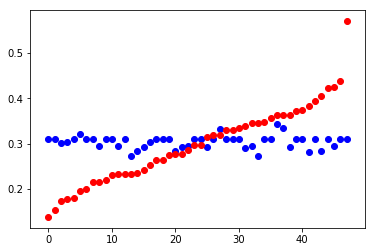

MSE                      = 0.00754000172062
MAE                      = 0.0698057249015
r2_score                 = -0.0210382350022    (best_value is 1)
explained_variance_score = -0.015423217626    (best_value is 1)


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
y_pred = forest_grid.predict(x_hold)
predict_for_analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_pred})
# print('Анализ реальных aps с реальными значениями wc')
print('Анализ реальных aps с аппроксимированными значениями wc')
data_analize_func(predict_for_analize_fake)

In [ ]:
import pickle
# Loading the saved decision tree model pickle
decision_tree_pkl_filename = 'fake_data\\decision_forest_grid_fake_data_regressor.pkl'
decision_tree_model_pkl_load = open(decision_tree_pkl_filename, 'rb')
decision_tree_model = pickle.load(decision_tree_model_pkl_load)
print("Loaded Decision tree model :: ", decision_tree_model)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
y_pred = decision_tree_model.predict(x_values)
predict_for_analize_fake = pd.DataFrame({'y_hold':y_values, 'y_predict':y_pred})
# print('Анализ реальных aps с реальными значениями wc')
print('Анализ реальных aps с аппроксимированными значениями wc')
data_analize_func(predict_for_analize_fake)